In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

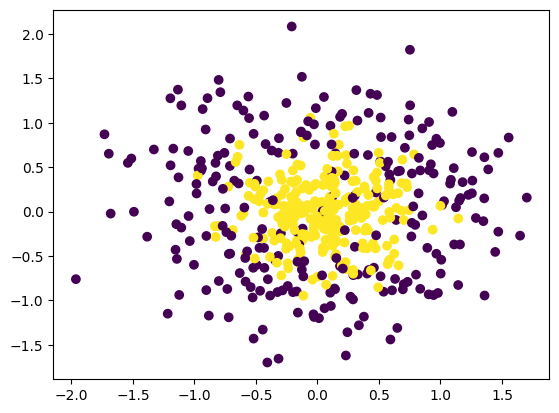

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

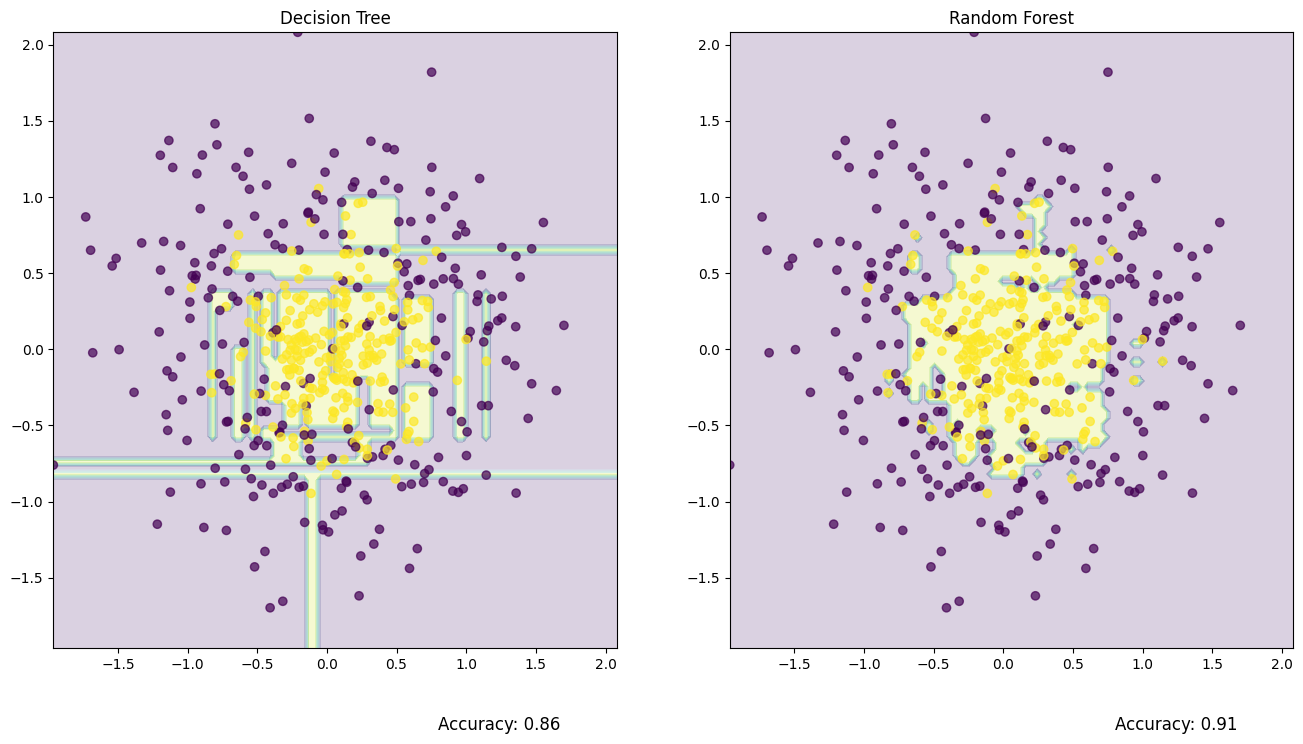

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the decision tree classifier and fit the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Create the random forest classifier and fit the model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Define the range for x values
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)

# Create subplots
plt.figure(figsize=(16, 8))  # Increase the figure size

# Plot the Decision Tree in the first subplot
plt.subplot(121)  # 1 row, 2 columns, first subplot
y_hat_dtree = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat_dtree = y_hat_dtree.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat_dtree, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Decision Tree")

# Calculate and display Decision Tree accuracy
y_pred_dtree = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test, y_pred_dtree)
plt.text(0.8, -2.5, f'Accuracy: {acc_dtree:.2f}', fontsize=12)

# Plot the Random Forest in the second subplot
plt.subplot(122)  # 1 row, 2 columns, second subplot
y_hat_rf = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat_rf = y_hat_rf.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat_rf, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Random Forest")

# Calculate and display Random Forest accuracy
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
plt.text(0.8, -2.5, f'Accuracy: {acc_rf:.2f}', fontsize=12)

plt.show()


# Showing with Features How Random Forest is Better than Bagging

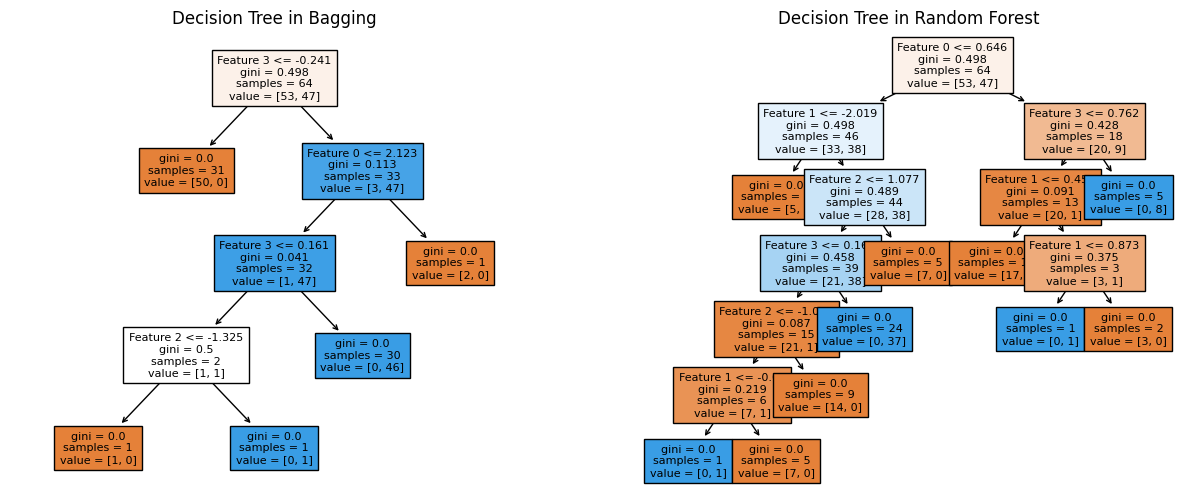

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Generate synthetic data with 5 features
X, y = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=0, random_state=42)

# Bagging with Decision Trees using 2 features
bagging_base_model = DecisionTreeClassifier(random_state=42, max_features=2)
bagging_model = BaggingClassifier(bagging_base_model, n_estimators=5, random_state=42)
bagging_model.fit(X, y)

# Random Forest with 5 features and changing features at every node
random_forest_model = RandomForestClassifier(n_estimators=5, max_features=2, random_state=42)
random_forest_model.fit(X, y)

# Visualize a single decision tree in Bagging
bagging_tree = bagging_model.estimators_[0]
plt.figure(figsize=(15, 6))
plt.subplot(121)
plot_tree(bagging_tree, filled=True, feature_names=[f'Feature {i}' for i in range(5)], fontsize=8)
plt.title("Decision Tree in Bagging")

# Visualize a single decision tree in Random Forest
rf_tree = random_forest_model.estimators_[0]
plt.subplot(122)
plot_tree(rf_tree, filled=True, feature_names=[f'Feature {i}' for i in range(5)], fontsize=8)
plt.title("Decision Tree in Random Forest")

plt.show()


# Random forest - how to find important features

In [32]:
!pip install kaggle

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets download -d c/digit-recognizer

403 - Forbidden - Permission 'datasets.get' was denied


In [36]:
import pandas as pd
file_path = '/content/drive/My Drive/train.csv'
df = pd.read_csv(file_path)

In [37]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df.iloc[:,1:]
y = df.iloc[:,0]




<Axes: >

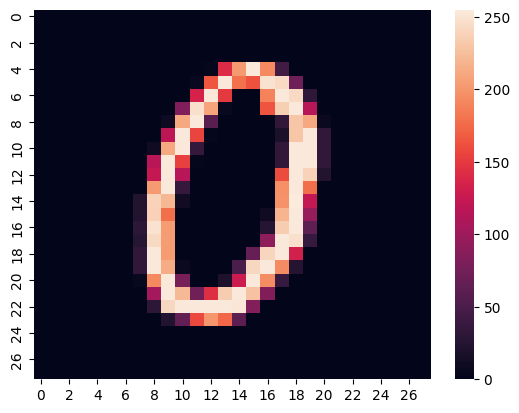

In [39]:
sns.heatmap(X.iloc[5].values.reshape(28,28))

# Applying Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [41]:
# this will give number for all feature based on their importance
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.25093667e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66538206e-06,
       3.39025791e-06, 7.10174831e-06, 6.87877707e-06, 3.97411192e-06,
       3.02983691e-06, 5.80847624e-06, 5.19718561e-06, 9.73497373e-07,
       5.74149793e-06, 3.96958293e-07, 3.02238016e-06, 4.78889977e-06,
       1.36931062e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [42]:
rf.feature_importances_.shape

(784,)

<Axes: >

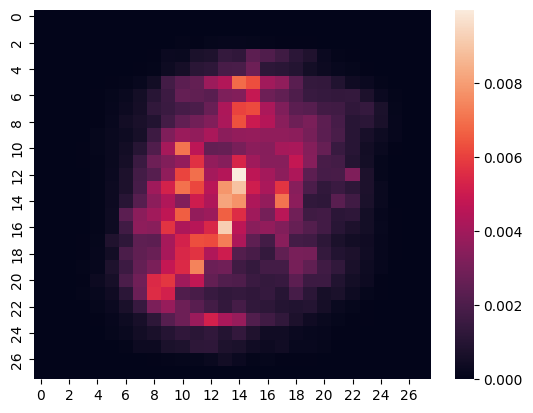

In [43]:
sns.heatmap(rf.feature_importances_.reshape(28,28))
# in this heatmap graph the features are n centre are most useful features compare to pixels/feature are in dark colour.

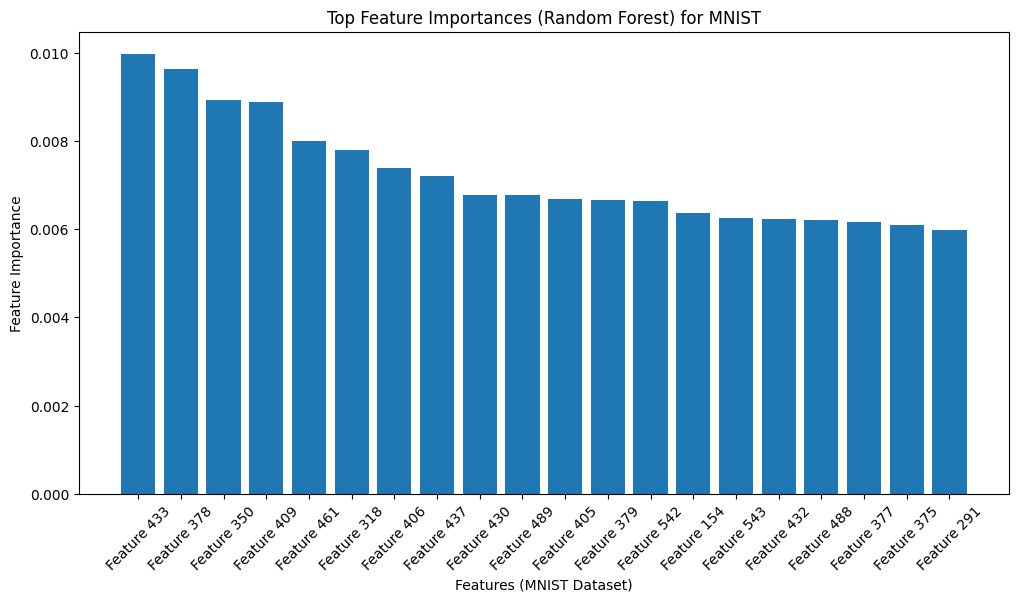

In [50]:

# Cast labels to integers
y = y.astype(int)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Select the top N features (e.g., top 20)
num_top_features = 20
top_feature_indices = sorted_indices[:num_top_features]
top_feature_importances = sorted_feature_importances[:num_top_features]

# Create a list of feature names (MNIST features)
mnist_feature_names = [f"Feature {i}" for i in top_feature_indices]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(num_top_features), top_feature_importances, align="center")
plt.xticks(range(num_top_features), mnist_feature_names, rotation=45)
plt.xlabel("Features (MNIST Dataset)")
plt.ylabel("Feature Importance")
plt.title("Top Feature Importances (Random Forest) for MNIST")
plt.show()
